In [ ]:
!pip install --upgrade google-cloud-vision

In [63]:
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
import os
from PIL import Image
import requests
from io import BytesIO
from urllib.request import urlopen

In [2]:
df = pd.read_csv("postmodel.csv")
df = df.set_index("date")

In [3]:
hashtags = df["hashtags"].map(lambda tags: tags.split(",") if isinstance(tags, str) else tags)
hashtags = hashtags[hashtags.apply(isinstance, args=(list,))]

all_hashtags_list = [v for hv in hashtags for v in hv]
unique_hashtags = set(all_hashtags_list)

In [4]:
pd.Series(all_hashtags_list).value_counts()

cusco               11234
peru                 6267
lima                 2006
travel               1627
perú                 1568
                    ...  
cayonlake               1
lifeexpiriences         1
scrapbook               1
fotografiadeaves        1
elquesabesabe           1
Length: 36054, dtype: int64

In [5]:
df.index = pd.DatetimeIndex(data=df.index)

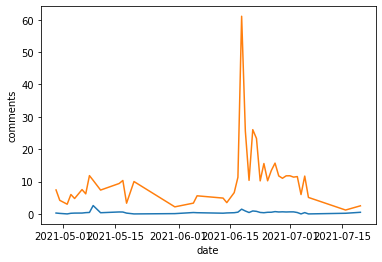

In [6]:
sn.lineplot(data=df.resample("D").mean(), x="date", y="comments")
sn.lineplot(data=df.resample("D").mean(), x="date", y="likes")

In [13]:
from google.cloud import vision

In [19]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="constellation-323321-ec26b9dbfb2f.json"

In [20]:
client = vision.ImageAnnotatorClient()

In [91]:
img_url = "https://laciudadinvisible.sfo2.digitaloceanspaces.com/laciudadinvisible/CQ8on-2rQ15.jpg"

image = vision.Image()
image.source.image_uri = img_url

vision_response = client.label_detection(image=image)
labels = vision_response.label_annotations

print('Labels:')
for label in labels:
    print(label.description, '(%.2f%%)' % (label.score*100.))


Labels:
Train (98.53%)
Plant (95.50%)
Sky (94.20%)
Cloud (93.99%)
Mountain (90.74%)
Nature (89.97%)
Rolling stock (89.33%)
Vehicle (89.19%)
Highland (84.18%)
Electricity (84.17%)


In [120]:
demo_set = df[:50]

# for d in demo_set:
    # print(d[""])

    
series = []
for row in demo_set.iterrows():
    id = row[1]["id"]
    hashtags = row[1]["hashtags"]
    image_uri = row[1]["image_uri"]

    image = vision.Image()
    image.source.image_uri = image_uri

    vision_response = client.label_detection(image=image)
    labels = vision_response.label_annotations

    # print('Labels:')
    # for label in labels:
    #     print(label.description, '(%.2f%%)' % (label.score*100.))

    labels_descriptions = [l.description for l in labels]
    series.append(pd.Series({"id": id, "hashtags": hashtags, "image_uri": image_uri, "labels": labels_descriptions}))

In [118]:
series[0]["image_uri"]

'https://laciudadinvisible.sfo2.digitaloceanspaces.com/laciudadinvisible/CO8-3lxJurc.jpg'

In [121]:
pd.DataFrame(series)

,id,hashtags,image_uri,labels
0,CO8-3lxJurc,"cusco,viajes,travel,peru,cuzco",https://laciudadinvisible.sfo2.digitaloceanspa...,"[Cloud, Jeans, Sky, Smile, Leg, Blue, Azure, P..."
1,CO8-6UhHGLS,"fd3s,rx7,13b,13bt,rotary,rotarygang,mazdaflow,...",https://laciudadinvisible.sfo2.digitaloceanspa...,"[Car, Vehicle, Wheel, Automotive lighting, Hoo..."
2,CO8-ErhDzQH,"jordan,zapatillasjordan,jordanretro,zaptillasj...",https://laciudadinvisible.sfo2.digitaloceanspa...,"[Footwear, Shoe, Walking shoe, Grey, Sneakers,..."
3,CO8-GcaHR8h,"ayacucho,cusco,pichari,unsch,café,coffee",https://laciudadinvisible.sfo2.digitaloceanspa...,"[Drinkware, Tableware, Beer, Barware, Beer gla..."
4,CO8-PJjli3X,"sacredjourneys,ritual,cusco,peru,spiritualjour...",https://laciudadinvisible.sfo2.digitaloceanspa...,"[Building, Sky, Window, Infrastructure, Road s..."
5,CO8-YX9La4H,"naturaleza,peru,nature,travel,photography,land...",https://laciudadinvisible.sfo2.digitaloceanspa...,"[Blue, Sleeve, Plant, Waist, Happy, Sportswear..."
6,CO8-a4spLqs,"artesania,cuarzos,cristales,hechoconamor,hecho...",https://laciudadinvisible.sfo2.digitaloceanspa...,"[Outerwear, Sleeve, Fashion design, Pattern, W..."
7,CO8-eyZpvQX,"tb,trekking,roads,peru,cusco",https://laciudadinvisible.sfo2.digitaloceanspa...,"[Mountain, Plant, Cloud, Green, Sky, Nature, P..."
8,CO8-kuMJcJb,"urubamba,vallesagrado,cusco,cleteada",https://laciudadinvisible.sfo2.digitaloceanspa...,"[Plant, Cloud, Sky, Building, Property, Flower..."
9,CO8-sGKp4Lc,"vallesagrado,cusco,aranwa,family,felicidad,esc...",https://laciudadinvisible.sfo2.digitaloceanspa...,"[Plant, Blue, Azure, Flowerpot, Leisure, Tree,..."


In [123]:
series[28]["image_uri"]

'https://laciudadinvisible.sfo2.digitaloceanspaces.com/laciudadinvisible/CO85VaIBy4X.jpg'